**Importing the Libraries**

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

**Loading the dataset: MNIST**

In [0]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

**DataLoader to interate over data and create shuffled batch size**

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

**Load Torch for building Neural Network**

In [0]:
import torch.nn as nn
import torch.nn.functional as F

**Building our neural network**

In [5]:
fc1_input = 28*28
fc1_output = 64
fc2_output = fc1_output
fc3_output = fc2_output
fc4_output = 10
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(fc1_input, fc1_output)
        self.fc2 = nn.Linear(fc1_output, fc2_output)
        self.fc3 = nn.Linear(fc2_output, fc3_output)
        self.fc4 = nn.Linear(fc3_output, fc4_output)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


**Testing the forward logic**

In [0]:
X = torch.rand((28,28))
X = X.view(1,28*28)

In [7]:
output = net(X)
print(output)

tensor([[-2.1515, -2.2919, -2.1883, -2.3058, -2.4280, -2.4204, -2.2889, -2.3930,
         -2.2438, -2.3543]], grad_fn=<LogSoftmaxBackward>)


**Training**

In [8]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data 
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
        
    print(loss)
      
      

tensor(0.5355, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.0050, grad_fn=<NllLossBackward>)


**Accuracy**

In [9]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.966


**Plot**

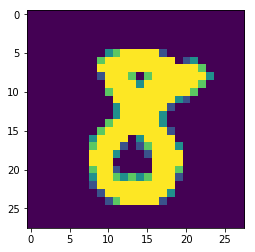

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x[1].view(28,28))
plt.show()

In [17]:
torch.argmax(net(x[1].view(-1,28*28))[0])

tensor(8)